In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy as stats

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()


In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.metadata.create_all(engine)

# reflect the tables
Base.prepare(engine, reflect = True)


C:\Users\taylo\AppData\Local\Temp\ipykernel_40476\1858717765.py:6: RemovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base.prepare(engine, reflect = True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [9]:
inspector = inspect(engine)

In [10]:
# Inspect column names and type
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Inspect column names and type
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent

('2017-08-23',)

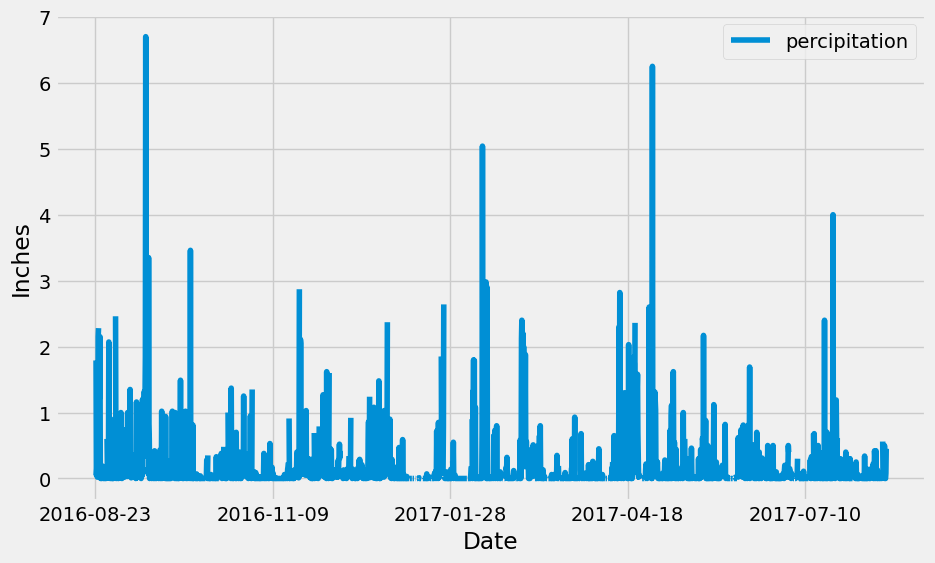

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_data = session.query(measurement.date).order_by(measurement.date.desc())

# Calculate the date one year from the last date in data set.
one_year_date = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
percipitation_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurement_df = pd.DataFrame(percipitation_scores, columns=['date', 'percipitation']).set_index('date')

# Sort the dataframe by date
sorted_df = measurement_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(station.id).count()
station_count

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_temp = session.query(func.min(measurement.tobs)).filter(measurement.station=='USC00519281').all()

high_temp = session.query(func.max(measurement.tobs)).filter(measurement.station=='USC00519281').all()

avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()
print(low_temp)
print(high_temp)
print(avg_temp)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


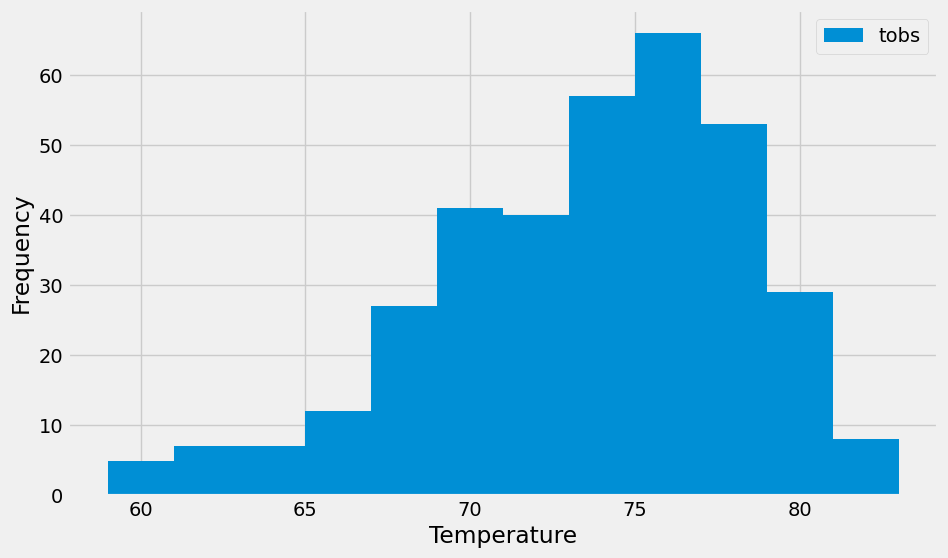

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query(measurement.tobs).filter(measurement.date >= one_year_date).filter(measurement.station=='USC00519281').all()
tobs_df = pd.DataFrame(tobs, columns=['tobs'])
tobs_df.plot.hist(bins=12, figsize=(10,6))
plt.xlabel('Temperature')
plt.show()

# Close Session

In [21]:
# Close Session
session.close()